In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt

In [28]:
df=pd.read_csv('airquality_updated.csv')
print(df.columns)

Index(['Date', 'Time', 'CO', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH'],
      dtype='object')


Root Mean Squared Error of Training Set: 0.7793
Root Mean Squared Error of Validation Set: 0.7672
Root Mean Squared Error of Test Set: 0.7546


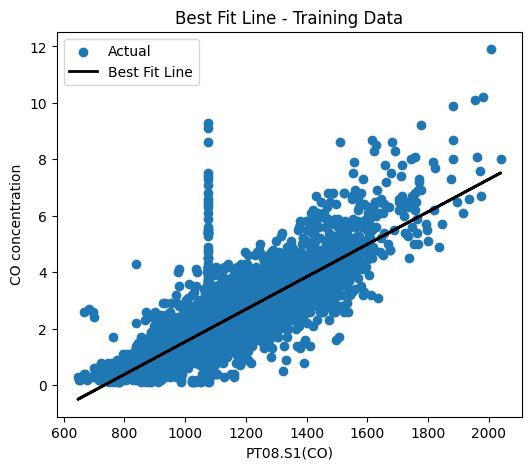

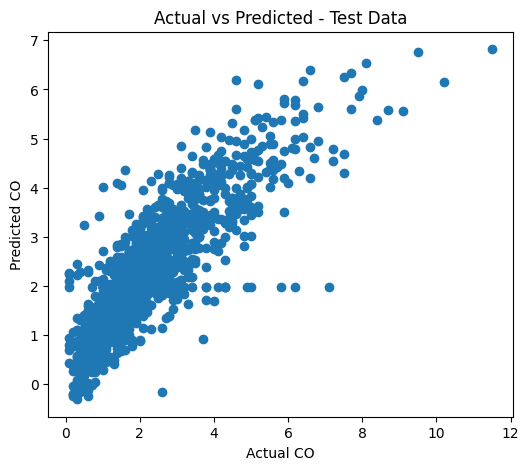

In [31]:
X=df[['PT08.S1(CO)']].values
y=df['CO'].values
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred_train = regressor.predict(X_train)
y_pred_val = regressor.predict(X_val)
y_pred_test = regressor.predict(X_test)
rmse_train = sqrt(mean_squared_error(y_train, y_pred_train))
rmse_val = sqrt(mean_squared_error(y_val, y_pred_val))
rmse_test = sqrt(mean_squared_error(y_test, y_pred_test))

print(f"Root Mean Squared Error of Training Set: {rmse_train:.4f}")
print(f"Root Mean Squared Error of Validation Set: {rmse_val:.4f}")
print(f"Root Mean Squared Error of Test Set: {rmse_test:.4f}")
plt.figure(figsize=(6, 5))
plt.scatter(X_train, y_train, label="Actual")
plt.plot(X_train, y_pred_train, color='black', linewidth=2, label="Best Fit Line")
plt.xlabel('PT08.S1(CO)')
plt.ylabel('CO concentration')
plt.title('Best Fit Line - Training Data')
plt.legend()
plt.show()

plt.figure(figsize=(6, 5))
plt.scatter(y_test, y_pred_test)
plt.xlabel('Actual CO')
plt.ylabel('Predicted CO')
plt.title('Actual vs Predicted - Test Data')
plt.show()
